| Name                 | UIN       |
|----------------------|-----------|
| Huy Lai              | 132000359 |
| Alexander Nuccitelli | 000000000 |
| Cole Jahnke          | 530009075 |

MATH 151-557  
19 October 2021

In [1]:
from sympy import *
from sympy.plotting import (plot, plot_parametric)

# 1a Equation of tangent line when t=pi/4

In [2]:
t = symbols('t')
x = cos(t)
y = sin(t) + 3
t0 = pi/4
dydx = y.diff(t) / x.diff(t)
line = dydx.subs(t, t0) * (symbols('x') - x.subs(t, t0)) + y.subs(t, t0)
print(line)
print(line.evalf())

-x + sqrt(2) + 3
4.41421356237309 - x


# 1b points where tangent line is vertical

In [3]:
[(x.subs(t, t0), y.subs(t, t0)) for t0 in solve(x.diff(t), t)]

[(1, 3), (-1, 3)]

# 1c Plot parametrized curve and all tangent lines

In [4]:
matplotlib notebook

<IPython.core.display.Javascript object>


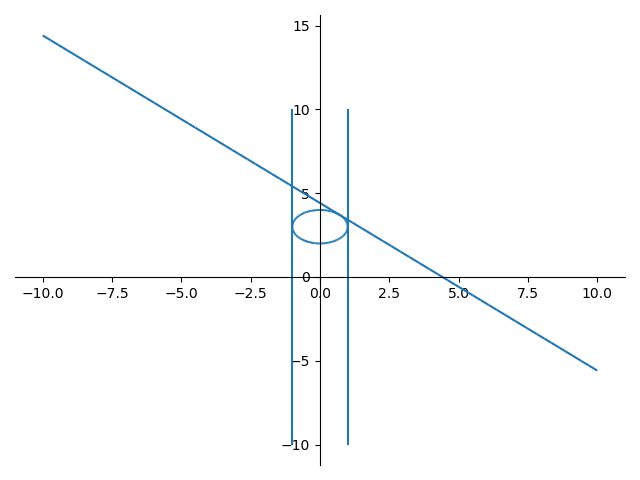

In [5]:
plt = plot_parametric((x, y, (t, 0, 2 * pi)), show = False)
p_vert = plot_parametric((-1, t), (1, t), show = False)
plt.extend(plot(line, show = False))
plt.extend(p_vert)
plt.show()

# 2 Tangent lines at (3,0)

In [6]:
t = symbols('t')

x = t ** 2
y = t ** 3 - 3 * t
dydx = y.diff(t) / x.diff(t)
t_vals = list(set(solve(x - 3, t)) & set(solve(y - 0, t)))
slopes = [dydx.subs(t, t0) for t0 in t_vals]
lines = [slopes[t0] * (symbols('x') - x.subs(t, t_vals[t0])) + y.subs(t, t_vals[t0]) for t0 in range(len(t_vals))]
print(lines)

[sqrt(3)*(x - 3), -sqrt(3)*(x - 3)]


# 2b Plot of parametrized curve and tangent lines

In [7]:
matplotlib notebook

<IPython.core.display.Javascript object>


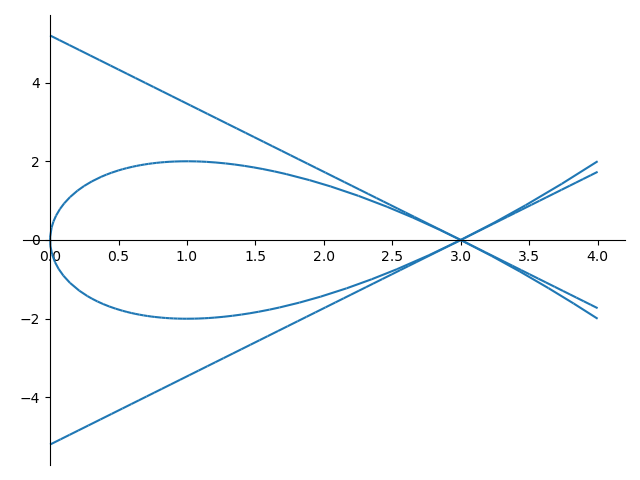

In [8]:
plt = plot(lines[0], lines[1], (symbols('x'), 0, 4), show = False)
plt_par = plot_parametric((x, y, (t, -2, 2)), show = False)
plt_par.extend(plt)
plt_par.show()

# 3a find k and y0

In [9]:
k = symbols('k', real=True)
t = symbols('t')
y0 = symbols('y0', real=True)
y = y0 * exp(k * t)
eq1 = y.subs(t, 1) - 200
eq2 = y.subs(t, Rational(3,2))- 360
answers = solve((eq1, eq2), (y0, k))
print('y0 =', answers[0][0],', k =', answers[0][1])

y0 = 5000/81 , k = log(81/25)


# 3b When population = 2000

In [10]:
q = answers[0][0] * exp(answers[0][1] * t)
print(simplify(solve(q - 2000, t)[0]))
print(solve(q - 2000, t)[0].evalf())

log((162/5)**(1/log(81/25)))
2.95869116338109


# 3c find k and population 1 hour before "initial"

In [11]:
k = symbols('k', real=True)
t = symbols('t')
y0 = symbols('y0', real=True)
y = y0 * exp(k * t)
eq1 = y.subs(t, 0) - 200
eq2 = y.subs(t, Rational(1,2))- 360
answers = solve((eq1, eq2), (y0, k))
print('y0 =', answers[0][0],', k =', answers[0][1])
q = answers[0][0] * exp(answers[0][1] * t)
print(q.subs(t, -1))
print('The value of t = -1 when the equation if offset by one is equal to the y0 value when the equation was not offset')

y0 = 200 , k = log(81/25)
5000/81
The value of t = -1 when the equation if offset by one is equal to the y0 value when the equation was not offset


# 4a rate of change in f with respect to each variable

In [12]:
L = symbols('L')
T = symbols('T')
p = symbols('p')
f = (1 / (2 * L)) * sqrt(T / p)
dfdL = f.diff(L)
dfdT = f.diff(T)
dfdp = f.diff(p)
print('dfdL =', dfdL,'dfdT =', dfdT,'dfdp =', dfdp)

dfdL = -sqrt(T/p)/(2*L**2) dfdT = sqrt(T/p)/(4*L*T) dfdp = -sqrt(T/p)/(4*L*p)


# 4b interpret what happens to the pitch

In [13]:
print('when the length decreases the frequency increases')
print('when the tension increases the frequency increases')
print('when the linear density increases the frequency decreases')

when the length decreases the frequency increases
when the tension increases the frequency increases
when the linear density increases the frequency decreases


# 4c Plot rho vs T

In [14]:
matplotlib notebook

<IPython.core.display.Javascript object>


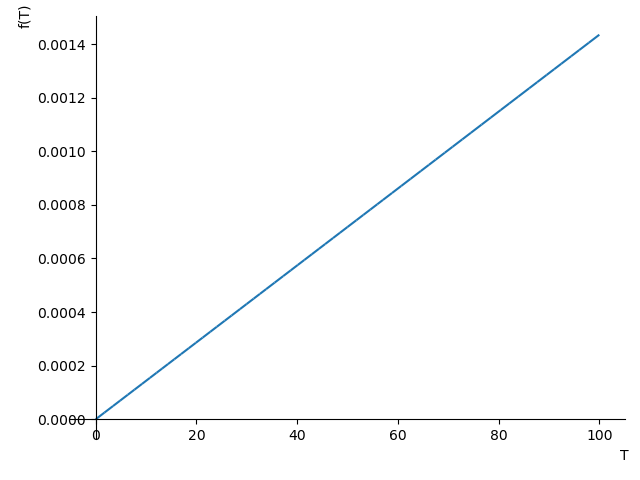

In [15]:
L = symbols('L')
T = symbols('T')
p = symbols('p')
f = (1 / (2 * .3)) * sqrt(T / p)
f.subs(L, .3)
equ = solve(f - 440, p)
plt = plot(equ[0], (T, 0, 100))

# 4d tuning tension when rho=.00078

In [16]:
equa = equ[0] - .00078
answers = solve(equa, T)
print(answers[0])

54.3628800000000
